In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('Social_Network_Ads.csv')


In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Female'

In [7]:
#if the above error encounters i.e could not convert text to float value, use this code:
#this error occurs when when we acces values of X = dataset.iloc[:, [0, 1]].values where 0, 1 are the userid and gender

# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()
# dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
# dataset['Gender'].unique()


array([1, 0])

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
y_pred

array([28, 38, 35, 28, 35, 26, 33, 35, 20, 47, 28, 26, 35, 38, 20, 31, 35,
       20, 52, 35, 35, 48, 41, 48, 24, 48, 28, 28, 35, 31, 20, 35, 60, 35,
       26, 20, 20, 35, 28, 47, 28, 41, 28, 35, 42, 26, 35, 48, 26, 48, 53,
       35, 35, 35, 60, 47, 28, 26, 47, 24, 31, 60, 20, 35, 19, 60, 26, 26,
       41, 41, 31, 35, 20, 47, 28, 20, 41, 41, 49, 48, 53, 60, 26, 26, 60,
       41, 41, 60, 47, 41, 41, 39, 20, 26, 26, 28, 20, 47, 48, 39],
      dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [13]:
cm

array([[0, 0, 3, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.21


In [15]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         0
          19       0.33      1.00      0.50         1
          20       1.00      0.09      0.17        11
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         0
          26       1.00      0.25      0.40        12
          27       0.00      0.00      0.00         0
          28       0.50      0.09      0.15        11
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

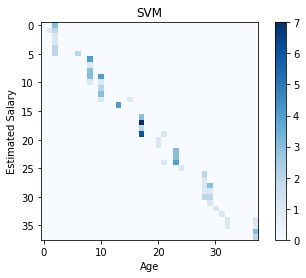

In [16]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.colorbar()

# Show the plot
plt.show()